# Imports

In [6]:
import importlib.resources as resources
import numpy as np
import pydot

from anypick_dk.constants import IIWA_LEN, WSG_VEL_BOUND
from anypick_dk.planner import Planner
from anypick_dk.sim_environment import SimEnvironment
from IPython.display import SVG, display
from pydrake.all import GcsTrajectoryOptimization, SaveIrisRegionsYamlFile

# Simulation Environment Setup

In [2]:
scenario_file = str(resources.files("anypick_dk") / "scenarios" / "shelf_no_objects.yaml")
sim_env = SimEnvironment(scenario_file)
planner = Planner(sim_env)
q0 = sim_env.get_iiwa_position()

INFO:drake:Meshcat listening for connections at http://localhost:7000


# Create Start Region

In [5]:
sim_env.set_iiwa_position(q0)
sim_env.publish_diagram()

In [15]:
start_region = planner.create_iris_region(q0)

INFO:drake:IrisInConfigurationSpace iteration 0
INFO:drake:IrisInConfigurationSpace: Terminating because the hyperellipsoid volume change 0.008596339132959934 is below the threshold 0.02.


In [16]:
sim_env.animate_iris(start_region)

INFO:anypick_dk.sim_environment:Press the 'Stop Animation' button in Meshcat to continue


# Create Home and Transition Regions

In [47]:
q0_Home = [0, 0.7, 0, -1.5, 0, -0.5, 0]
sim_env.set_iiwa_position(q0_Home)
sim_env.publish_diagram()

In [49]:
p_Home = [0.55, 0.0, 0.4]
q_Home = planner.solve_ik_pos(p_Home, q0_Home)
sim_env.set_iiwa_position(q_Home)
sim_env.publish_diagram()

INFO:anypick_dk.planner:IK success


In [ ]:
home_region = planner.create_iris_region(q_Home)

INFO:drake:IrisInConfigurationSpace iteration 0
INFO:drake:IrisInConfigurationSpace: Terminating because the hyperellipsoid volume change 0.0008757938715261063 is below the threshold 0.02.


In [20]:
sim_env.animate_iris(home_region)

INFO:anypick_dk.sim_environment:Press the 'Stop Animation' button in Meshcat to continue


In [69]:
q0_Transition = [0, 1.0, 0, -1.7, 0, -0.8, 0]
sim_env.set_iiwa_position(q0_Transition)
sim_env.publish_diagram()

In [73]:
p_Transition = [0.55, 0.0, 0.15]
q_Transition = planner.solve_ik_pos(p_Transition, q0_Transition)
sim_env.set_iiwa_position(q_Transition)
sim_env.publish_diagram()

INFO:anypick_dk.planner:IK success


In [74]:
transition_region = planner.create_iris_region(q_Transition)

INFO:drake:IrisInConfigurationSpace iteration 0
INFO:drake:IrisInConfigurationSpace: Terminating because the hyperellipsoid volume change 8.834326366185182e-07 is below the threshold 0.02.


In [75]:
sim_env.animate_iris(transition_region)

INFO:anypick_dk.sim_environment:Press the 'Stop Animation' button in Meshcat to continue


# Create Top Shelf Regions

In [21]:
q0_TopShelf = [0, 0.4, 0, -1.1, 0, 0.43, 0]
sim_env.set_iiwa_position(q0_TopShelf)
sim_env.publish_diagram()

In [22]:
p_TopShelf = [0.85, 0.0, 0.65]
q_TopShelf = planner.solve_ik_pos(p_TopShelf, q0_TopShelf)
sim_env.set_iiwa_position(q_TopShelf)
sim_env.publish_diagram()

INFO:anypick_dk.planner:IK success


In [23]:
top_shelf_region = planner.create_iris_region(q_TopShelf)

INFO:drake:IrisInConfigurationSpace iteration 0
INFO:drake:IrisInConfigurationSpace: Terminating because the hyperellipsoid volume change 4.943344603021077e-08 is below the threshold 0.02.


In [9]:
sim_env.animate_iris(top_shelf_region)

INFO:anypick_dk.sim_environment:Press the 'Stop Animation' button in Meshcat to continue


In [24]:
p_TopShelfApproach = [0.7, 0.0, 0.65]
q_TopShelfApproach = planner.solve_ik_pos(p_TopShelfApproach, q0_TopShelf)
sim_env.set_iiwa_position(q_TopShelfApproach)
sim_env.publish_diagram()

INFO:anypick_dk.planner:IK success


In [25]:
top_shelf_approach_region = planner.create_iris_region(q_TopShelfApproach)

INFO:drake:IrisInConfigurationSpace iteration 0
INFO:drake:IrisInConfigurationSpace: Terminating because the hyperellipsoid volume change 2.89529929877227e-07 is below the threshold 0.02.


In [12]:
sim_env.animate_iris(top_shelf_approach_region)

INFO:anypick_dk.sim_environment:Press the 'Stop Animation' button in Meshcat to continue


# Create Middle Shelf Regions

In [26]:
q0_MidShelf = [0, 0.7, 0, -1.5, 0, -0.5, 0]
sim_env.set_iiwa_position(q0_MidShelf)
sim_env.publish_diagram()

In [27]:
p_MidShelf = [0.85, 0.0, 0.4]
q_MidShelf = planner.solve_ik_pos(p_MidShelf, q0_MidShelf)
sim_env.set_iiwa_position(q_MidShelf)
sim_env.publish_diagram()

INFO:anypick_dk.planner:IK success


In [28]:
mid_shelf_region = planner.create_iris_region(q_MidShelf)

INFO:drake:IrisInConfigurationSpace iteration 0
INFO:drake:IrisInConfigurationSpace: Terminating because the hyperellipsoid volume change 6.0688582445290604e-09 is below the threshold 0.02.


In [13]:
sim_env.animate_iris(mid_shelf_region)

INFO:anypick_dk.sim_environment:Press the 'Stop Animation' button in Meshcat to continue


In [29]:
p_MidShelfApproach = [0.7, 0.0, 0.4]
q_MidShelfApproach = planner.solve_ik_pos(p_MidShelfApproach, q0_MidShelf)
sim_env.set_iiwa_position(q_MidShelfApproach)
sim_env.publish_diagram()

INFO:anypick_dk.planner:IK success


In [30]:
mid_shelf_approach_region = planner.create_iris_region(q_MidShelfApproach)

INFO:drake:IrisInConfigurationSpace iteration 0
INFO:drake:IrisInConfigurationSpace: Terminating because the hyperellipsoid volume change 9.53584301560018e-08 is below the threshold 0.02.


In [29]:
sim_env.animate_iris(mid_shelf_approach_region)

INFO:anypick_dk.sim_environment:Press the 'Stop Animation' button in Meshcat to continue


# Create Bottom Shelf Regions

In [31]:
q0_BotShelf = [0, 1.25, 0, -1.3, 0, -0.9, 0]
sim_env.set_iiwa_position(q0_BotShelf)
sim_env.publish_diagram()

In [32]:
p_BotShelf = [0.85, 0.0, 0.15]
q_BotShelf = planner.solve_ik_pos(p_BotShelf, q0_BotShelf)
sim_env.set_iiwa_position(q_BotShelf)
sim_env.publish_diagram()

INFO:anypick_dk.planner:IK success


In [33]:
bot_shelf_region = planner.create_iris_region(q_BotShelf)

INFO:drake:IrisInConfigurationSpace iteration 0
INFO:drake:IrisInConfigurationSpace: Terminating because the hyperellipsoid volume change 1.7239730840863038e-08 is below the threshold 0.02.


In [17]:
sim_env.animate_iris(bot_shelf_region)

INFO:anypick_dk.sim_environment:Press the 'Stop Animation' button in Meshcat to continue


In [34]:
p_BotShelfApproach = [0.7, 0.0, 0.15]
q_BotShelfApproach = planner.solve_ik_pos(p_BotShelfApproach, q0_BotShelf)
sim_env.set_iiwa_position(q_BotShelfApproach)
sim_env.publish_diagram()

INFO:anypick_dk.planner:IK success


In [35]:
bot_shelf_approach_region = planner.create_iris_region(q_BotShelfApproach)

INFO:drake:IrisInConfigurationSpace iteration 0
INFO:drake:IrisInConfigurationSpace: Terminating because the hyperellipsoid volume change 4.440391070198158e-08 is below the threshold 0.02.


In [32]:
sim_env.animate_iris(bot_shelf_approach_region)

INFO:anypick_dk.sim_environment:Press the 'Stop Animation' button in Meshcat to continue


# Create Object Region

In [36]:
p_Object = [0.2, 0.6, 0.25]
q_Object = planner.solve_ik_pos(p_Object, q0)
sim_env.set_iiwa_position(q_Object)
sim_env.publish_diagram()

INFO:anypick_dk.planner:IK success


In [37]:
object_region = planner.create_iris_region(q_Object)

INFO:drake:IrisInConfigurationSpace iteration 0
INFO:drake:IrisInConfigurationSpace iteration 1
INFO:drake: Checking wsg::collision against table::box_collision has already required 30 counter-example searches; still searching...
INFO:drake: Finished checking wsg::collision against table::box_collision after 72 counter-example searches.
INFO:drake: Checking wsg::right_tip against shelves::left_wall has already required 30 counter-example searches; still searching...
INFO:drake: Finished checking wsg::right_tip against shelves::left_wall after 31 counter-example searches.
INFO:drake:IrisInConfigurationSpace: terminating iterations because the seed point is no longer in the region.


In [42]:
sim_env.animate_iris(object_region)

INFO:anypick_dk.sim_environment:Press the 'Stop Animation' button in Meshcat to continue


# Save IRIS Regions

In [76]:
iris_regions = {
    "start_region": start_region,
    "home_region": home_region,
    "transition_region": transition_region,
    "top_shelf_region": top_shelf_region,
    "top_shelf_approach_region": top_shelf_approach_region,
    "mid_shelf_region": mid_shelf_region,
    "mid_shelf_approach_region": mid_shelf_approach_region,
    "bot_shelf_region": bot_shelf_region,
    "bot_shelf_approach_region": bot_shelf_approach_region,
    "object_region": object_region
}
SaveIrisRegionsYamlFile("shelf_regions.yaml", iris_regions)

# Test GCS Connectivity

In [ ]:
def create_base_gcs(iris_regions: dict, sim_env: SimEnvironment) -> GcsTrajectoryOptimization:

    gcs = GcsTrajectoryOptimization(IIWA_LEN + 2)

    start_node = gcs.AddRegions(
        [iris_regions["start_region"]], order=1, name="start"
    )
    home_node = gcs.AddRegions(
        [iris_regions["home_region"]], order=1, name="home"
    )
    transition_node = gcs.AddRegions(
        [iris_regions["transition_region"]], order=1, name="transition"
    )
    top_shelf_node = gcs.AddRegions(
        [iris_regions["top_shelf_region"]], order=1, name="top_shelf"
    )
    top_shelf_approach_node = gcs.AddRegions(
        [iris_regions["top_shelf_approach_region"]], order=1, name="top_shelf_approach"
    )
    mid_shelf_node = gcs.AddRegions(
        [iris_regions["mid_shelf_region"]], order=1, name="mid_shelf"
    )
    mid_shelf_approach_node = gcs.AddRegions(
        [iris_regions["mid_shelf_approach_region"]], order=1, name="mid_shelf_approach"
    )
    bot_shelf_node = gcs.AddRegions(
        [iris_regions["bot_shelf_region"]], order=1, name="bot_shelf_region"
    )
    bot_shelf_approach_node = gcs.AddRegions(
        [iris_regions["bot_shelf_approach_region"]], order=1, name="bot_shelf_approach"
    )
    object_node = gcs.AddRegions(
        [iris_regions["object_region"]], order=1, name="object"
    )

    gcs.AddEdges(start_node, home_node)

    gcs.AddEdges(home_node, object_node)
    gcs.AddEdges(object_node, home_node)

    gcs.AddEdges(home_node, top_shelf_approach_node)
    gcs.AddEdges(top_shelf_approach_node, home_node)

    gcs.AddEdges(home_node, mid_shelf_approach_node)
    gcs.AddEdges(mid_shelf_approach_node, home_node)

    gcs.AddEdges(home_node, transition_node)
    gcs.AddEdges(transition_node, home_node)

    gcs.AddEdges(transition_node, bot_shelf_approach_node)
    gcs.AddEdges(bot_shelf_approach_node, transition_node)

    gcs.AddEdges(top_shelf_approach_node, top_shelf_node)
    gcs.AddEdges(top_shelf_node, top_shelf_approach_node)

    gcs.AddEdges(mid_shelf_approach_node, mid_shelf_node)
    gcs.AddEdges(mid_shelf_node, mid_shelf_approach_node)

    gcs.AddEdges(bot_shelf_approach_node, bot_shelf_node)
    gcs.AddEdges(bot_shelf_node, bot_shelf_approach_node)

    gcs.AddTimeCost()
    lb = sim_env.plant.GetVelocityLowerLimits()[:IIWA_LEN + 2]
    lb[~np.isfinite(lb)] = -WSG_VEL_BOUND
    ub = sim_env.plant.GetVelocityUpperLimits()[:IIWA_LEN + 2]
    ub[~np.isfinite(ub)] = WSG_VEL_BOUND
    gcs.AddVelocityBounds(lb, ub)
    return gcs

def show_gcs_graph(gcs: GcsTrajectoryOptimization) -> None:
    display(SVG(pydot.graph_from_dot_data(gcs.GetGraphvizString())[0].create_svg()))

NameError: name 'SimEnvironment' is not defined

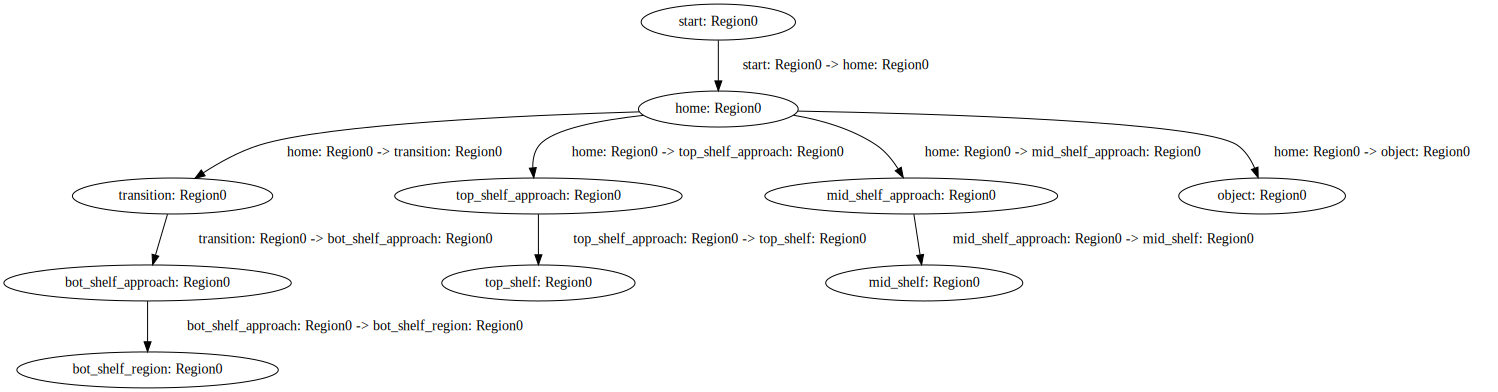

In [78]:
gcs = create_base_gcs(iris_regions, sim_env)
show_gcs_graph(gcs)